In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Booheymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [4]:
df_india = df[(df['job_country']=='India')& (df['job_title_short']=='Data Analyst')].explode('job_skills').copy()
df_india['job_posted_month'] = df_india['job_posted_date'].dt.month
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",sql,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",python,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",databricks,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",power bi,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",excel,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,shell,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,sql server,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,tableau,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,microstrategy,"{'analyst_tools': ['tableau', 'microstrategy']...",1


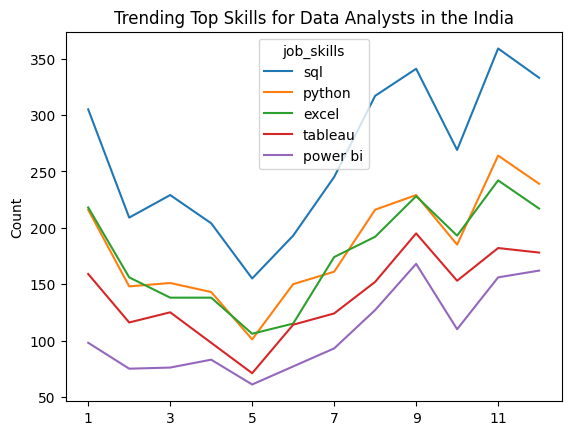

In [ ]:
df_india_pivot = df_india.pivot_table(
    index='job_posted_month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_india_pivot.loc['total'] = df_india_pivot.sum()
df_india_pivot = df_india_pivot[df_india_pivot.loc['total'].sort_values(ascending=False).index]
df_india_pivot = df_india_pivot.drop('total')
df_india_pivot.iloc[:, :5].plot(kind='line')
plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [18]:
# Get monthly totals
DA_totals = df_india.groupby('job_posted_month').size()

DA_totals

job_posted_month
1     2338
2     1640
3     1740
4     1625
5     1076
6     1486
7     1819
8     2454
9     2393
10    1998
11    2671
12    2285
dtype: int64

In [25]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_IND_percent = df_india_pivot.iloc[:12].div(DA_totals/100, axis=0)
df_DA_IND_percent = df_DA_IND_percent.reset_index()
df_DA_IND_percent['job_posted_month'] = df_DA_IND_percent['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_IND_percent = df_DA_IND_percent.set_index('job_posted_month')
df_DA_IND_percent

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13.045338,9.238666,9.324209,6.800684,4.191617,3.806672,5.474765,1.967494,1.368691,1.839179,...,0.000000,0.042772,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.042772,0.000000
Feb,12.743902,9.024390,9.512195,7.073171,4.573171,4.085366,5.000000,1.585366,2.012195,1.524390,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,13.160920,8.678161,7.931034,7.183908,4.367816,3.333333,3.563218,2.586207,2.183908,1.666667,...,0.000000,0.000000,0.000000,0.057471,0.00000,0.000000,0.000000,0.057471,0.000000,0.000000
Apr,12.553846,8.800000,8.492308,6.030769,5.107692,3.446154,3.200000,2.461538,1.907692,1.723077,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,14.405204,9.386617,9.851301,6.598513,5.669145,3.903346,2.788104,3.066914,2.044610,1.765799,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.092937
Jun,12.987887,10.094213,7.738896,7.671602,5.181696,5.114401,4.979812,2.489906,2.153432,1.615074,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,13.468939,8.851017,9.565695,6.816932,5.112699,3.683342,4.288070,2.144035,1.704233,1.704233,...,0.054975,0.000000,0.054975,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,12.917685,8.801956,7.823961,6.193969,5.175224,4.563977,3.993480,2.118989,2.567237,1.629992,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,14.249896,9.569578,9.527789,8.148767,7.020476,4.178855,3.844547,1.462599,1.713331,1.211868,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


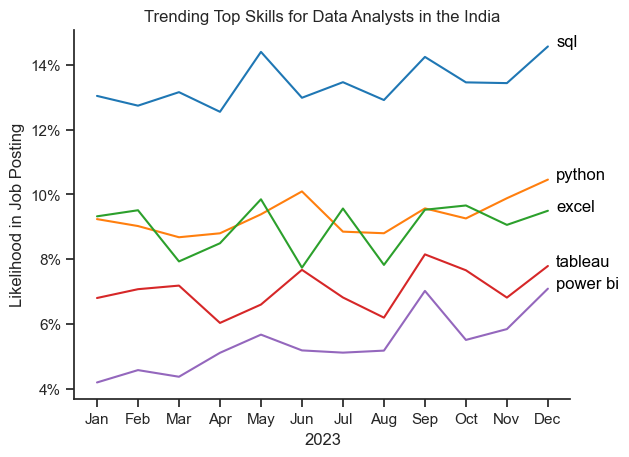

In [27]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_IND_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()